# `datetime`, and `matplotlib` intro

This lesson rounds out the introductory pandas work and introduces our basic plotting library `matplotlib`.  

**OBJECTIVES**

- Understand and use `datetime` objects in pandas DataFrames
- Use `matplotlib` to produce basic plots from data
- Understand when to use histograms, boxplots, line plots, and scatterplots with data


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `datetime`

A special type of data for pandas are entities that can be considered as dates.  We can create a special datatype for these using `pd.to_datetime`, and access the functions of the `datetime` module as a result.

In [2]:
# read in the AAPL data
url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/AAPL.csv'

#read_csv
aapl = pd.read_csv(url)
aapl.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-04-25,5.212857,5.288571,5.158571,5.282857,3.522625,186615100
1,2005-04-26,5.254286,5.358572,5.160000,5.170000,3.447372,202626900
2,2005-04-27,5.127143,5.194286,5.072857,5.135714,3.424510,153472200


In [3]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3523 non-null   object 
 1   Open       3523 non-null   float64
 2   High       3523 non-null   float64
 3   Low        3523 non-null   float64
 4   Close      3523 non-null   float64
 5   Adj Close  3523 non-null   float64
 6   Volume     3523 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.8+ KB


In [5]:
# convert to datetime
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3523 non-null   datetime64[ns]
 1   Open       3523 non-null   float64       
 2   High       3523 non-null   float64       
 3   Low        3523 non-null   float64       
 4   Close      3523 non-null   float64       
 5   Adj Close  3523 non-null   float64       
 6   Volume     3523 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 192.8 KB


In [6]:
# extract the month
aapl['Date'].dt.month

0       4
1       4
2       4
3       4
4       4
       ..
3518    4
3519    4
3520    4
3521    4
3522    4
Name: Date, Length: 3523, dtype: int64

In [7]:
# extract the day
aapl['Date'].dt.day

0       25
1       26
2       27
3       28
4       29
        ..
3518    16
3519    17
3520    18
3521    22
3522    23
Name: Date, Length: 3523, dtype: int64

In [9]:
# set date to be index of data
aapl.set_index('Date', inplace = True)

In [11]:
# sort the index
aapl.sort_index(inplace = True)

In [15]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3523 entries, 2005-04-25 to 2019-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3523 non-null   float64
 1   High       3523 non-null   float64
 2   Low        3523 non-null   float64
 3   Close      3523 non-null   float64
 4   Adj Close  3523 non-null   float64
 5   Volume     3523 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 321.7 KB


In [14]:
# select 2019
aapl.loc['2018':'2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800
...,...,...,...,...,...,...
2019-04-16,199.460007,201.369995,198.559998,199.250000,199.250000,25696400
2019-04-17,199.539993,203.380005,198.610001,203.130005,203.130005,28906800
2019-04-18,203.119995,204.149994,202.520004,203.860001,203.860001,24195800


In [18]:
# read back in using parse_dates = True and index_col = 0
aapl = pd.read_csv(url, parse_dates = True, index_col = 0)
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3523 entries, 2005-04-25 to 2019-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3523 non-null   float64
 1   High       3523 non-null   float64
 2   Low        3523 non-null   float64
 3   Close      3523 non-null   float64
 4   Adj Close  3523 non-null   float64
 5   Volume     3523 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.7 KB


In [19]:
from datetime import datetime

In [20]:
# what time is it?
then = datetime.now()
then

datetime.datetime(2024, 9, 26, 15, 51, 22, 322906)

In [22]:
# how much time has passed?
datetime.now() - then

datetime.timedelta(seconds=110, microseconds=154544)

### More with timestamps

- Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.

- Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.


In [25]:
# create a pd.Timedelta
delta = pd.Timedelta('1W')

In [26]:
# shift a date by 3 months
datetime.now() + delta

datetime.datetime(2024, 10, 3, 15, 55, 26, 749137)

#### Problems

In [36]:
ufo_url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/ufo.csv'

1. Return to the ufo data and convert the Time column to a datetime object.

In [37]:
ufo = pd.read_csv(ufo_url)

2. Set the Time column as the index column of the data.

In [38]:
ufo.set_index('Time', inplace = True)

3. Sort it

In [39]:
ufo.sort_index(inplace = True)
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80543 entries, 1/1/1944 10:00 to 9/9/2013 9:51
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


4. Create a new dataframe with ufo sightings since January 1, 1999

In [43]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80543 entries, 1/1/1944 10:00 to 9/9/2013 9:51
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
dtypes: object(4)
memory usage: 5.1+ MB


In [45]:
ufo.index = pd.to_datetime(ufo.index)

In [47]:
ufo.loc['1999':]

<ipython-input-47-4de6a5ec51ed>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ufo.loc['1999':]


,City,Colors Reported,Shape Reported,State
Time,,,,
1999-01-01 14:00:00,Florence,NaN,CYLINDER,SC
1999-01-01 15:00:00,Lake Henshaw,NaN,CIGAR,CA
1999-01-01 17:15:00,Wilmington Island,NaN,LIGHT,GA
1999-01-01 18:00:00,DeWitt,NaN,LIGHT,AR
1999-01-01 19:12:00,Bainbridge Island,NaN,NaN,WA
...,...,...,...,...
2013-09-09 23:00:00,Starr,RED,DIAMOND,SC
2013-09-09 23:00:00,Edmond,RED,CIGAR,OK
2013-09-09 23:30:00,Ft. Lauderdale,RED,OVAL,FL


### Grouping with Dates

An operation similar to that of the `groupby` function can be used with dataframes whose index is a datetime object.  This is the `resample` function, and the groups are essentially a time period like week, month, year, etc. 

In [48]:
dow = sns.load_dataset('dowjones')

In [49]:
#check the info
dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


In [50]:
#handle the index
dow.set_index('Date', inplace = True)

In [51]:
#check that things changed
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 1914-12-01 to 1968-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   649 non-null    float64
dtypes: float64(1)
memory usage: 10.1 KB


In [52]:
dow.head()

,Price
Date,
1914-12-01,55.00
1915-01-01,56.55
1915-02-01,56.00
1915-03-01,58.30
1915-04-01,66.45


In [55]:
#average yearly price
dow.resample('M').mean()

,Price
Date,
1914-12-31,55.00
1915-01-31,56.55
1915-02-28,56.00
1915-03-31,58.30
1915-04-30,66.45
...,...
1968-08-31,883.72
1968-09-30,922.80
1968-10-31,955.47


In [56]:
#quarterly maximum price
dow.resample('Q').max()

,Price
Date,
1914-12-31,55.00
1915-03-31,58.30
1915-06-30,68.40
1915-09-30,85.50
1915-12-31,97.00
...,...
1967-12-31,907.54
1968-03-31,884.77
1968-06-30,906.82


## Introduction to `matplotlib`

Now, let us turn our attention to plotting data.  We begin with basic plots, and later explore some customization and additional plots.  For these exercises, we will use the stock price data and a dataset about antarctic penguins from the `seaborn` library.

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
penguins = sns.load_dataset('penguins')

### Line Plots with Matplotlib

To begin, select the `bill_length_mm` column of the data.  

In [59]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [60]:
### bill length
bill_length = penguins['bill_length_mm']

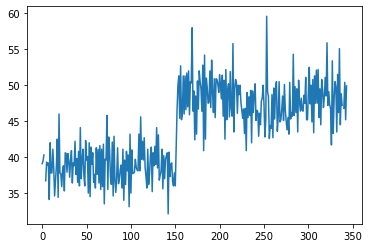

In [61]:
### plt.plot
plt.plot(bill_length)

<AxesSubplot: >

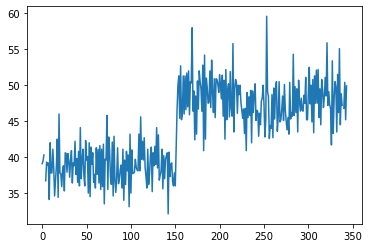

In [62]:
### use the series
bill_length.plot()

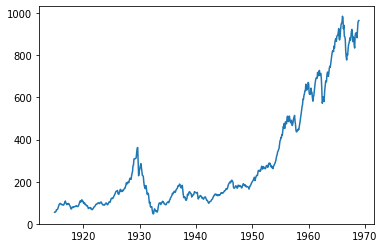

In [63]:
#plot dow jones Price with matplotlib
plt.plot(dow)

<AxesSubplot: xlabel='Date'>

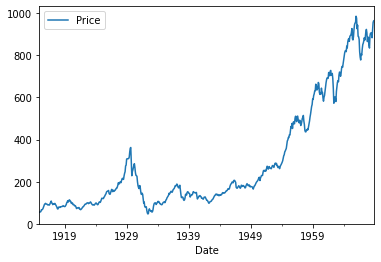

In [64]:
#plot dow jones data from series
dow.plot()

#### Choosing A Plot

Below, plots are shown first for single quantiative variables, then single categorical variables.  Next, two continuous variables, one continuous vs. one categorical, and any mix of continuous and categorical.

#### Histogram

A histogram *is an approximate representation of the distribution of numerical data*.  This is a plot we use for any single continuous feature to better understand the shape of the data.  

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

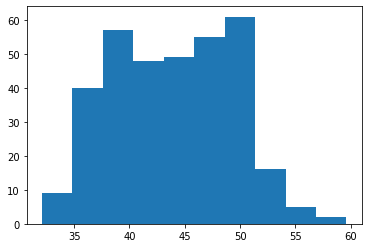

In [65]:
### bill length histogram
plt.hist(bill_length)

<AxesSubplot: >

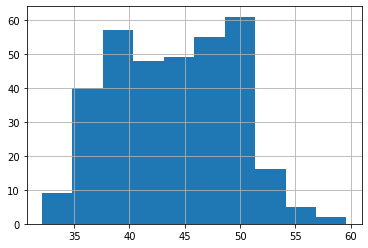

In [66]:
### as a method with the series
bill_length.hist()

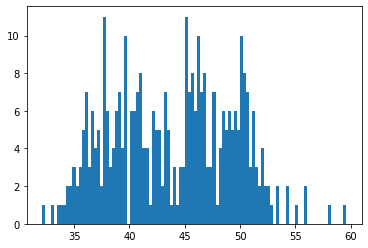

In [67]:
### adjusting the bin number
plt.hist(bill_length, bins = 100);

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

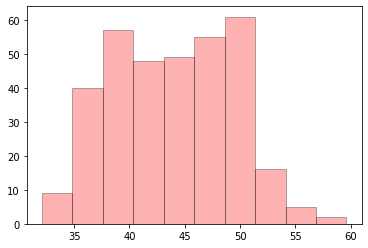

In [69]:
### adding a title, labels, edgecolor, and alpha
plt.hist(bill_length, 
         edgecolor = 'black', 
         color = 'red', 
         alpha = 0.3)

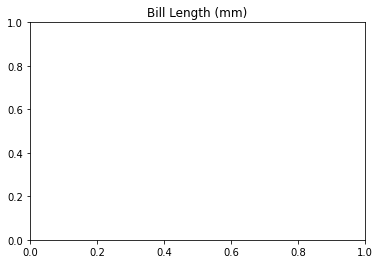

In [70]:
plt.title('Bill Length (mm)');

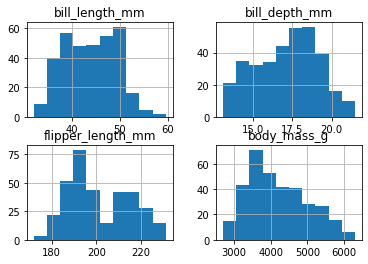

In [72]:
penguins.hist();

#### Boxplot

Similar to a histogram, a boxplot can be used on a single quantitative feature.

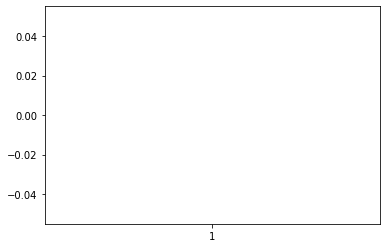

In [73]:
### boxplot of bill length
plt.boxplot(bill_length);

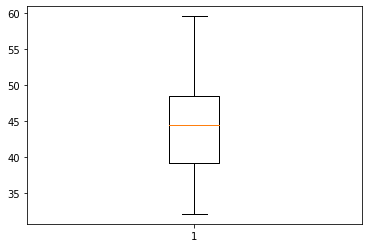

In [74]:
### WHOOPS -- lets try this without null values
plt.boxplot(bill_length.dropna());

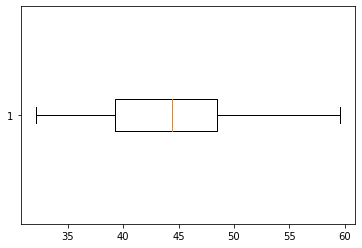

In [75]:
### Make a horizontal version of the plot
plt.boxplot(bill_length.dropna(), vert = False);

#### Bar Plot

A bar plot can be used to summarize a single categorical variable.  For example, if you want the counts of each unique category in a categorical feature. 

In [76]:
### counts of species
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot: >

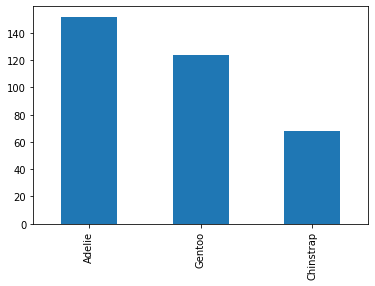

In [77]:
### barplot of counts
penguins['species'].value_counts().plot(kind = 'bar')

#### Two Variable Plots

In [78]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


#### Scatterplot

Two continuous features can be compared using scatterplots.  Typically, one is interested in if a relationship between the features exists and the strength and direction of many datasets.

In [79]:
### bill length vs. bill depth
x = bill_length
y = penguins['bill_depth_mm']

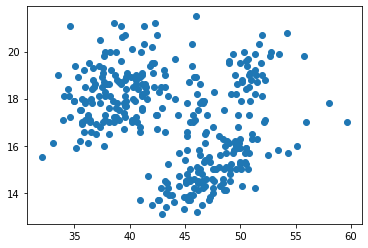

In [80]:
### scatterplot of x vs. y
plt.scatter(x, y)

#### `pandas.plotting`

There is not a quick easy plot in `matplotlib` to compare all numeric features in a dataset.  Instead, `pandas.plotting` has a `scatter_matrix` function that serves a similar purpose.

In [81]:
from pandas.plotting import scatter_matrix

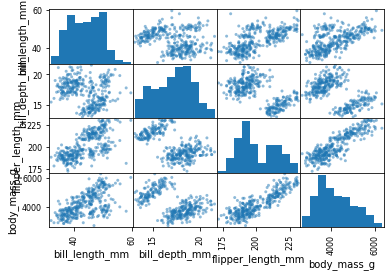

In [83]:
### scatter matrix of penguin data
scatter_matrix(penguins);

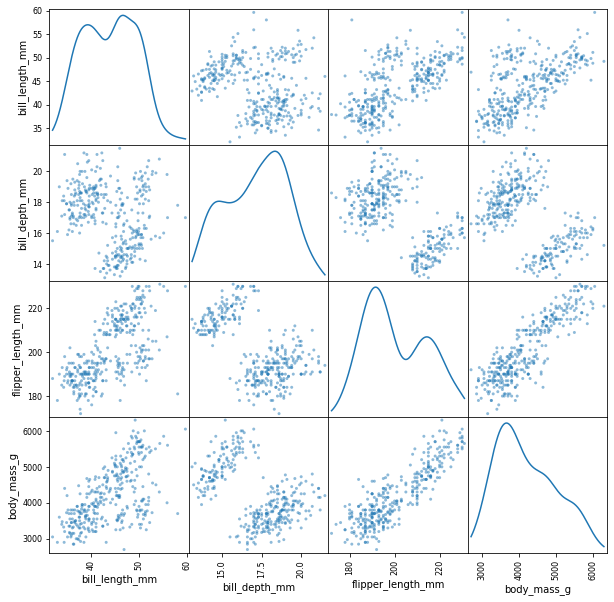

In [85]:
### adding arguments and changing size
scatter_matrix(penguins, diagonal = 'kde', figsize = (10, 10));

**PROBLEMS**

In [94]:
iris = sns.load_dataset('iris')

In [95]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


**Problem 1**: Histogram of `petal_length`

<AxesSubplot: >

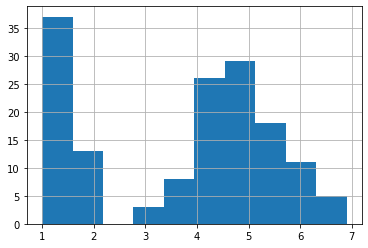

In [96]:
iris['petal_length'].hist()

**Problem 2**: Scatter plot of `sepal_length` vs. `sepal_width`.

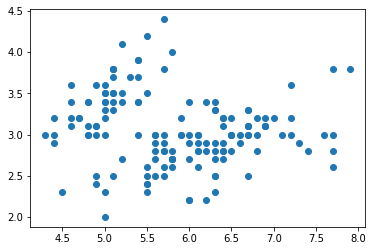

In [97]:
plt.scatter(iris.sepal_length, iris.sepal_width)

**Problem 3**: New column where 

```
setosa -> blue
virginica -> green
versicolor -> orange
```

In [99]:
iris['colors'] = iris['species'].replace({'setosa': 'blue', 'virginica': 'green', 'versicolor': 'orange'})

**Problem 4**: Scatterplot of `sepal_length` vs `petal_length` colored by species.

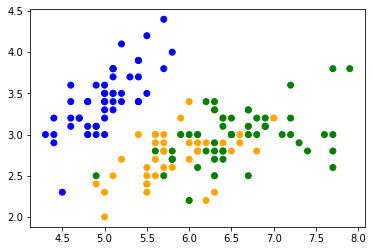

In [100]:
plt.scatter(iris.sepal_length, iris.sepal_width, c = iris.colors)

#### Subplots and Axes

![](https://matplotlib.org/stable/_images/users-explain-axes-index-1.2x.png)

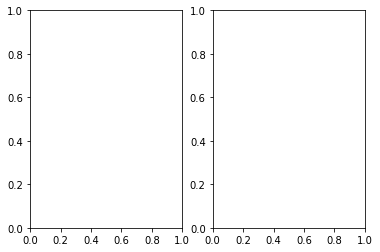

In [86]:
### create a 1 row 2 column plot
fig, ax = plt.subplots(1, 2)

Text(0.5, 1.0, 'Flipper Length')

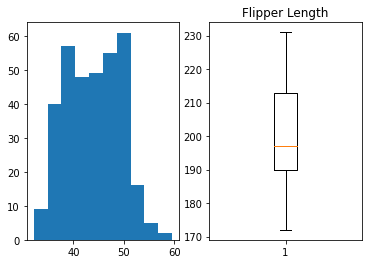

In [89]:
### add a plot to each axis
fig, ax = plt.subplots(1, 2)
ax[0].hist(bill_length)
ax[1].boxplot(penguins['flipper_length_mm'].dropna())
ax[1].set_title('Flipper Length')

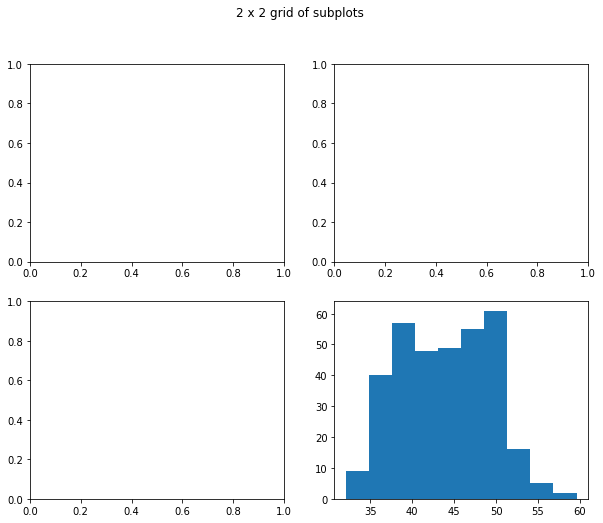

In [93]:
### create a 2 x 2 grid of plots
### add histogram to bottom right plot
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax[1, 1].hist(bill_length)
fig.suptitle('2 x 2 grid of subplots')
plt.savefig('subplottin.png')

#### Summary

Great job!  We will get practice plotting in this weeks homework and examine some other libraries and approaches during class next week.  For now, make sure you are familiar with the basic plots above -- histogram, boxplot, bar plot, scatterplot -- and when to use each.  